In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

from scanmsupport.scanm.scanm_smp import SMP

In [67]:
scmf = SMP()

In [80]:
# fname = "scanmsupport\data\M1_LR_GCL4_chirp"
fname_working = r"D:\Igor analyses\231005\0_3_FFF_Colour_1.smh"
fname = r"D:\Igor analyses\231005\1_1_SWN200_1a.smh"
fname = r"D:\Igor analyses\231005\Recovery test\1_1__SWN200_1.smh"
#fname = "scanmsupport\data\Q0_DN.smp"
_ = scmf.loadSMH(fname, verbose=True)

Processing file `D:\Igor analyses\231005\Recovery test\1_1__SWN200_1.smh`
Loading pre-header ...
Loading parameters (key-value pairs) ...
->     0 String, ComputerName = cssd901260;
->     1 String, UserName = TestAccount;
->     2 String, OriginalPixelDataFileName = C:\Users\TestAccount\Documents\WaveMetrics\Igor Pro 6 User Files\ScanM_Data\1_1__SWN200_1.smp;
->     3 String, DateStamp = 2023-10-5;
->     4 String, TimeStamp = 17-30-49-91;
->     5 String, ScanMproductVersionAndTargetOS = 0.1.36.63_4;
->     6 String, CallingProcessPath = C:\Program Files (x86)\WaveMetrics\Igor Pro Folder\Igor.exe;
->     7 String, CallingProcessVersion = 6.3.7.2;
->     8 UINT32, PixelSizeInBytes = 2;
->     9 UINT32, StimulusChannelMask = 15;
->    10 REAL32, MinVoltsAO = -4.000000;
->    11 REAL32, MaxVoltsAO = 4.000000;
->    12 UINT32, MaxStimulusBufferMapLength = 1;
->    13 UINT32, Channel_0_StimulusBufferMapEntry_#0 = 0;
->    14 UINT32, Channel_1_StimulusBufferMapEntry_#0 = 1;
->    15 UINT32

In [81]:
_ = scmf.loadSMP()

Processing file `D:\Igor analyses\231005\Recovery test\1_1__SWN200_1.smp`
Loading post-header ...
2 AI channel(s) (0b101)
181152 of 50000 buffer(s) (each 3200 pixels) per channel
181152 pixel bufs of 181152 read.
Done.


In [78]:
import scanmsupport.scanm.scanm_global as scanmglobal
scanmglobal.scm_load_pre_header(fname)

{'fileType': 'SMH',
 'GUID': 'b1f7d901308d5fae2923be84e16cd6ae',
 'headerLen_byte': 6010,
 'headerLen_values': 80,
 'headerStart_bytes': 64,
 'pixDataLen_byte': 2575630336,
 'analogDataLen_byte': 0}

In [79]:
scanmglobal.scm_load_pre_header(fname_working)

{'fileType': 'SMH',
 'GUID': '9ef7d901b07f9f552923be84e16cd6ae',
 'headerLen_byte': 6016,
 'headerLen_values': 80,
 'headerStart_bytes': 64,
 'pixDataLen_byte': 2575630336,
 'analogDataLen_byte': 76953600}

In [66]:
    d = dict()
    # Open file in binary mode to get pre-header
    with open(r"D:\Igor analyses\231005\1_1_SWN200_1a.smh", "rb") as f:
        f.seek(0)
        buf = f.read(64)
        hdr = struct.unpack("4H16s5Q", buf)
        d.update({"fileType": bytearray(hdr[0:3]).decode("utf-8")})
        d.update({"GUID": bytearray(hdr[4]).hex()})
        d.update({"headerLen_byte": hdr[5]})
        d.update({"headerLen_values": hdr[6]})
        d.update({"headerStart_bytes": hdr[7]})
        d.update({"pixDataLen_byte": hdr[8]})
        d.update({"analogDataLen_byte": hdr[9]})
    print(d)

{'fileType': 'SMH', 'GUID': 'b1f7d901308d5fae2923be84e16cd6ae', 'headerLen_byte': 6010, 'headerLen_values': 80, 'headerStart_bytes': 64, 'pixDataLen_byte': 2575630336, 'analogDataLen_byte': 0}


In [45]:
with open(r"D:\Igor analyses\231005\0_3_FFF_Colour_1.smh", "rb") as f:
    f.seek(0)
    buf = f.read(64)
    hdr = struct.unpack("4H16s5Q", buf)
    print(hdr[0:3])
    print(bytearray(hdr[0:3]).decode("utf-8"))
    print(bytearray(hdr[4]).hex())

(83, 77, 72)
SMH
9ef7d901b07f9f552923be84e16cd6ae


In [10]:
scmf.summary()

Summary
-------
Scan    : mode, type   : XYImage (0), 10
Pixel   : size         : 2 bytes/pixel
          duration     : 5.0 us (5.0)
Frame   : x-y size     : 200 x 64 pixels
          x-offset     : 32 pixels
          x-retrace    : 40 pixels
          count        : n/a
          organisation : 4 pixel buffers/frame
Stimulus: # of buffers : 4
          mask         : 1111
Input   : # of channels: 2
          mask         : 0101
Zoom factor            : 1.50


In [14]:
scmf._kvPairDict

{'ComputerName': [numpy.character, 1, 'cssd901260'],
 'UserName': [numpy.character, 1, 'TestAccount'],
 'OriginalPixelDataFileName': [numpy.character,
  1,
  'C:\\Users\\TestAccount\\Documents\\WaveMetrics\\Igor Pro 6 User Files\\ScanM_Data\\0_0_ColorSWN_200_0.smp'],
 'DateStamp': [numpy.character, 1, '2023-6-14'],
 'TimeStamp': [numpy.character, 1, '15-45-38-70'],
 'ScanMproductVersionAndTargetOS': [numpy.character, 1, '0.1.36.63_4'],
 'CallingProcessPath': [numpy.character,
  1,
  'C:\\Program Files (x86)\\WaveMetrics\\Igor Pro Folder\\Igor.exe'],
 'CallingProcessVersion': [numpy.character, 1, '6.3.7.2'],
 'PixelSizeInBytes': [numpy.uint32, 1, 2],
 'StimulusChannelMask': [numpy.uint32, 1, 15],
 'MinVoltsAO': [numpy.float64, 1, -4.0],
 'MaxVoltsAO': [numpy.float64, 1, 4.0],
 'MaxStimulusBufferMapLength': [numpy.uint32, 1, 1],
 'NumberOfStimulusBuffers': [numpy.uint32, 1, 4],
 'InputChannelMask': [numpy.uint32, 1, 5],
 'TargetedPixelDuration_µs': [numpy.float64, 1, 5.0],
 'RealPixelDur

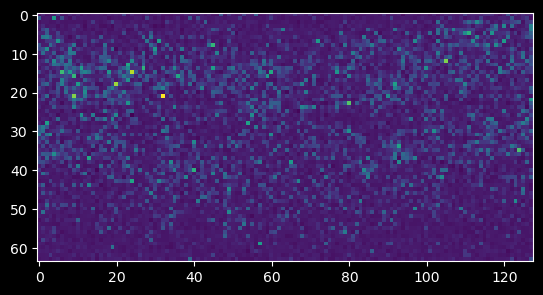

In [18]:
fr = scmf.getData(ch=0, crop=True)[1000]
# not_crop = scmf.getData(0)
plt.imshow(fr, interpolation='nearest')
plt.show()

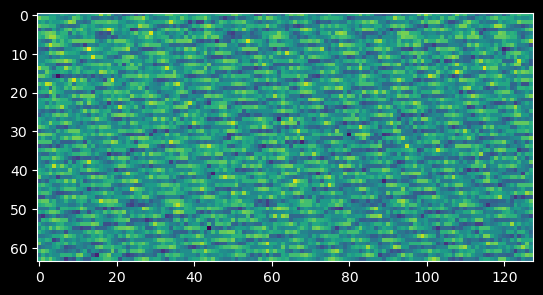

In [20]:
fr = scmf.getData(ch=2, crop=True)[0]

plt.imshow(fr, interpolation='nearest')
plt.show()

In [23]:
type(scmf)

scanmsupport.scanm.scanm_smp.SMP